# Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

### Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. This information and data can be retrieved from [fMNIT_Data](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

#### LOAD THE REQUIRED PYTHON LIBRARIES

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

#### STEP 1 LOAD THE fMNIST DATASET

In [17]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### STEP 2 EXPLORATORY DATA ANALYSIS

THE CLASSES OF THE DATASET

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)
num_classes = len(np.unique(train_labels))
print("Number of classes:", num_classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Number of classes: 10


CHECK THE SHAPE OF THE DATASET

In [19]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


CLASS DISTRIBUTION OF THE DATASET

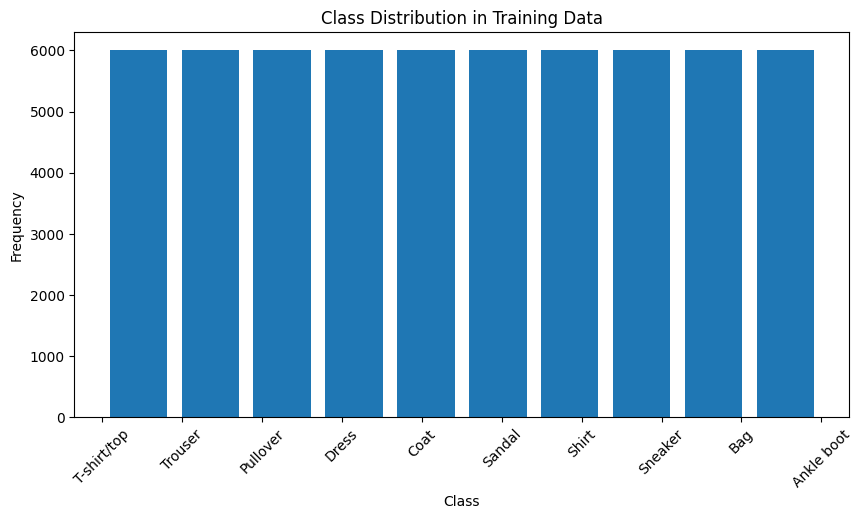

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(train_labels, bins=num_classes, rwidth=0.8)
plt.xticks(range(num_classes), class_names, rotation=45)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

The dataset seems to have a relatively balanced distribution across all classes, which is essential for training a model without bias towards specific classes.

DISPLAY THE SAMPLE IMAGE OF EACH CLASS

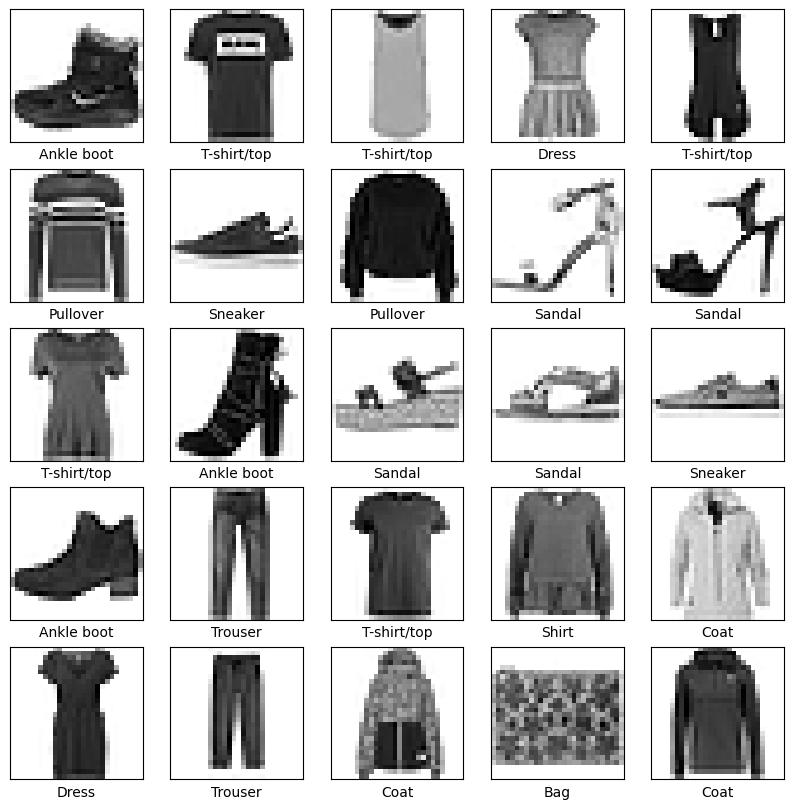

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


PIXEL VALUE OF AN IMAGE

In [22]:
def visualize_input(i, ax, y):
    img = train_images[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{train_labels[i]}-{class_names[train_labels[i]]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

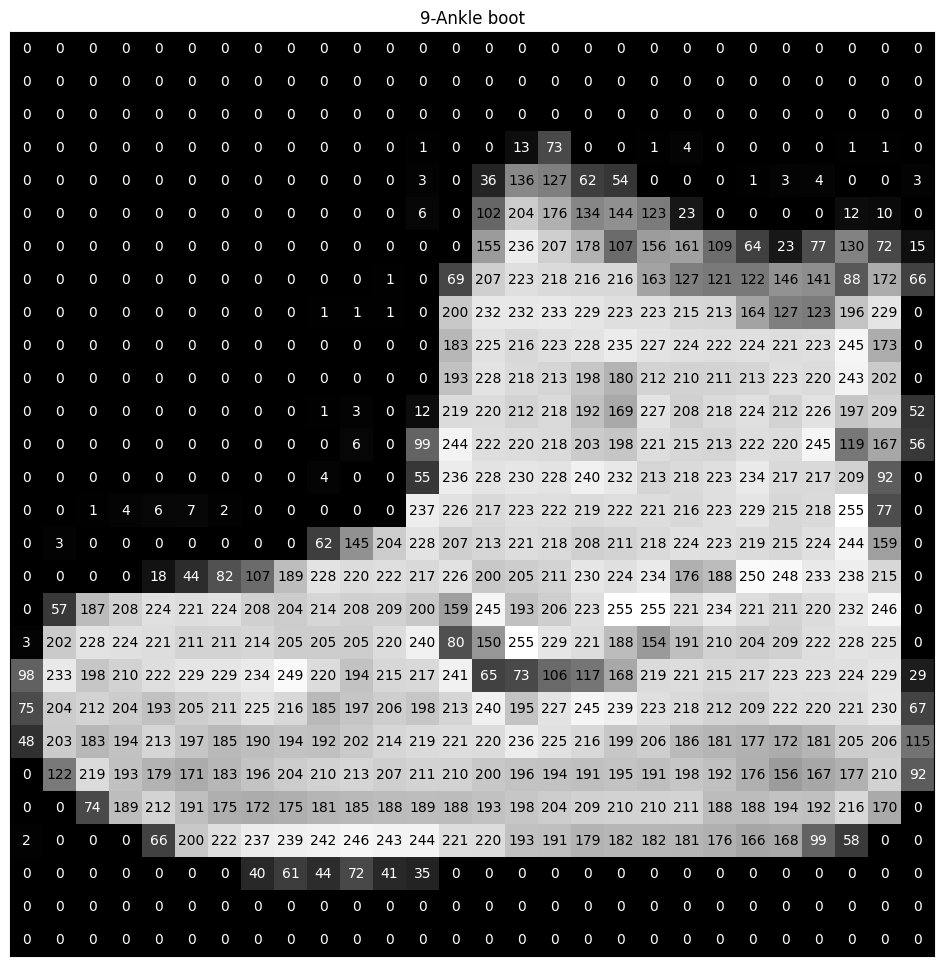

In [23]:
for i in range(1):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    visualize_input(i, ax, train_labels)

PIXEL VALUE DISTRIBUTION

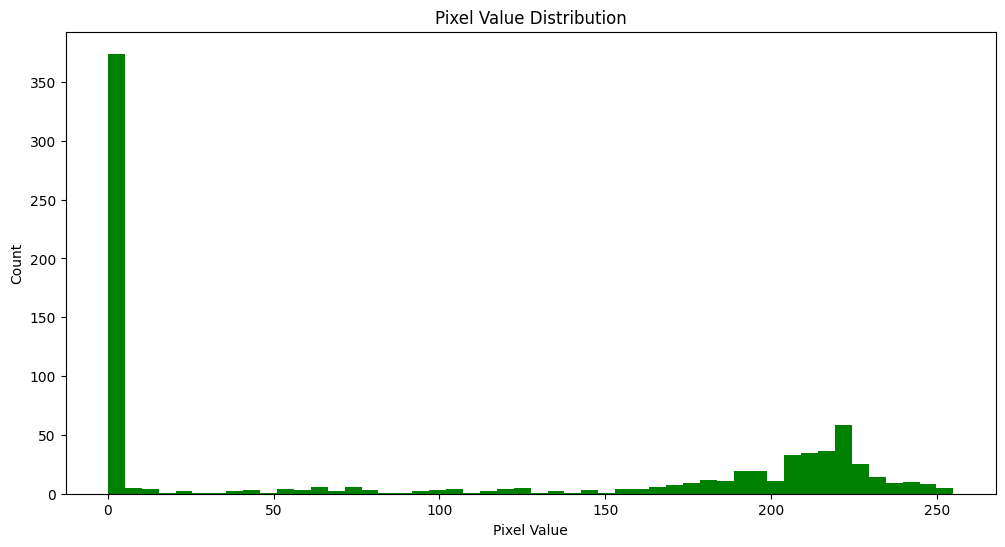

In [24]:
fig = plt.figure(figsize=(12, 6))
plt.hist(train_images[0].flatten(), bins=50, color='green')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()

PIXEL INTENSITY DISTRIBUTION OF EACH SAMPLE

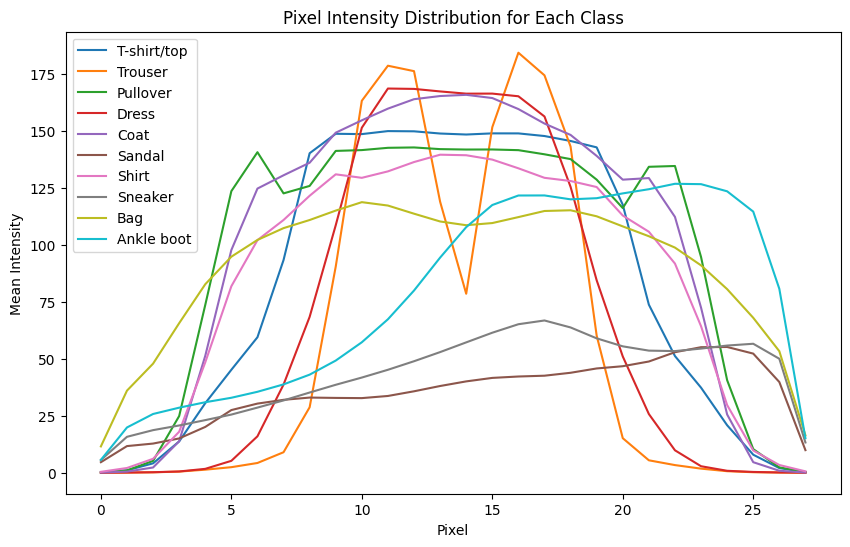

In [25]:
import numpy as np

class_pixel_intensity = []
for i in range(10):
    class_indices = np.where(train_labels == i)[0]
    class_images = train_images[class_indices]
    class_mean_intensity = np.mean(class_images, axis=(0, 1))
    class_pixel_intensity.append(class_mean_intensity)
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(class_pixel_intensity[i], label=class_names[i])
plt.title('Pixel Intensity Distribution for Each Class')
plt.xlabel('Pixel')
plt.ylabel('Mean Intensity')
plt.legend()
plt.show()

INSIGHTS

1. The dataset contains grayscale images of fashion items.
2. There are 10 classes representing different fashion categories.
3. The class distribution appears to be relatively balanced.
4. Pixel intensity values are distributed between 0 and 255.
5. There are no missing values in the dataset.

#### STEP 3 DEFINE AND TRAIN A FULLY-CONNECTED FEEDFORWARD NEURAL NETWORK

In [26]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model 
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  
    layers.Dense(128, activation='relu'), 
    layers.Dense(64, activation='relu'),   
    layers.Dense(10, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4969 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3661 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3294 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3094 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2908 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2769 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2542 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2452 - accuracy: 0.9080
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3251 

#### STEP 4 EVALUATE THE MODEL USING VALIDATION DATASET

In [27]:
import numpy as np
from sklearn.metrics import classification_report

# Predict class probabilities for the test dataset
test_probabilities = model.predict(test_images)

# Convert probabilities to class labels
test_predictions = np.argmax(test_probabilities, axis=1)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(test_labels, test_predictions, target_names=class_names))

313/313 [==============================] - 0s 807us/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.81      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.79      0.81      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.80      0.82      0.81      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.66      0.72      0.69      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



STEP 5 RUN THE MODEL ON TEST SET

In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test dataset
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, test_predictions_classes)
precision = precision_score(test_labels, test_predictions_classes, average='weighted')
recall = recall_score(test_labels, test_predictions_classes, average='weighted')
f1 = f1_score(test_labels, test_predictions_classes, average='weighted')

# Print evaluation metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

313/313 [==============================] - 0s 833us/step
Test Accuracy: 0.8865
Precision: 0.8882796995622287
Recall: 0.8865
F1 Score: 0.8870962646180431


The model does well in categorising fashion items, according to the evaluation of the model on the test set. The model's strong test accuracy, precision, recall, and F1 score indicate that it can efficiently generalise to new data and distinguish between various fashion categories. 

#### STEP 6 INCREASE PRECISION OF CLASS 5

313/313 [==============================] - 0s 838us/step


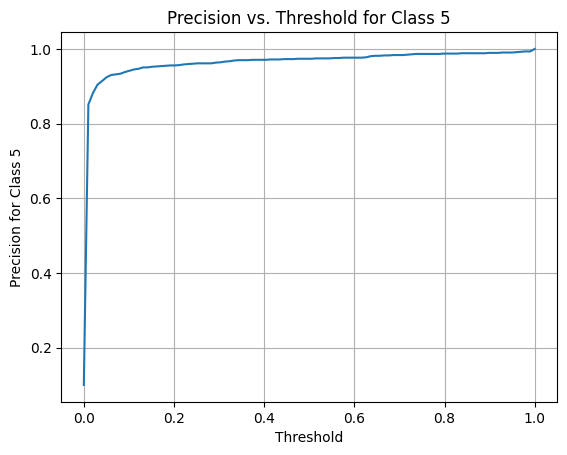

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

# Define the positive class for which we want to adjust the threshold
positive_class = 5

# Get the predicted probabilities for each class for the test dataset
test_probabilities = model.predict(test_images)

# Get the predicted probabilities for class '5'
class_5_probabilities = test_probabilities[:, positive_class]

# Get the true labels for class '5'
class_5_true_labels = (test_labels == positive_class).astype(int)

# Define a range of threshold values
threshold_values = np.linspace(0, 1, 100)

# Calculate precision for each threshold value
precision_values = []
for threshold in threshold_values:
    adjusted_predictions = (class_5_probabilities >= threshold).astype(int)
    precision = precision_score(class_5_true_labels, adjusted_predictions)
    precision_values.append(precision)

# Plot the precision values as a function of threshold
plt.plot(threshold_values, precision_values)
plt.xlabel('Threshold')
plt.ylabel('Precision for Class 5')
plt.title('Precision vs. Threshold for Class 5')
plt.grid(True)
plt.show()

#### STEP 7 INCREASE THE RECLL FOR CLASS 5

313/313 [==============================] - 0s 853us/step


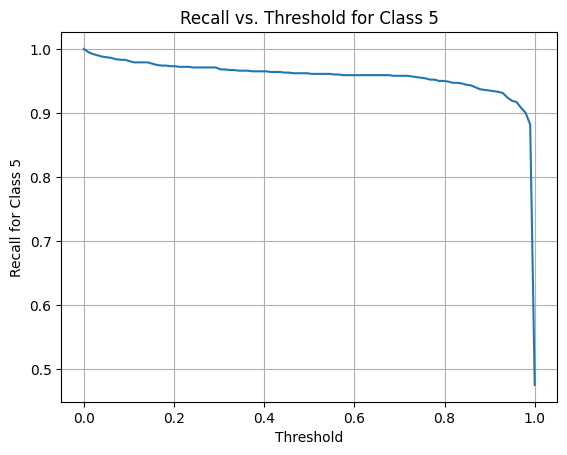

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Define the positive class for which we want to adjust the threshold
positive_class = 5

# Get the predicted probabilities for each class for the test dataset
test_probabilities = model.predict(test_images)

# Get the predicted probabilities for class '5'
class_5_probabilities = test_probabilities[:, positive_class]

# Get the true labels for class '5'
class_5_true_labels = (test_labels == positive_class).astype(int)

# Define a range of threshold values
threshold_values = np.linspace(0, 1, 100)

# Calculate recall for each threshold value
recall_values = []
for threshold in threshold_values:
    adjusted_predictions = (class_5_probabilities >= threshold).astype(int)
    recall = recall_score(class_5_true_labels, adjusted_predictions)
    recall_values.append(recall)

# Plot the recall values as a function of threshold
plt.plot(threshold_values, recall_values)
plt.xlabel('Threshold')
plt.ylabel('Recall for Class 5')
plt.title('Recall vs. Threshold for Class 5')
plt.grid(True)
plt.show()

CONCLUSION

1. The model's accuracy and recall for class '5' are impacted by changing the threshold. By catching more genuine positives, lowering the threshold can improve recall; but, it may also reduce precision because of an increase in false positives.

2. Precision and memory are frequently trade-offs. You might have to give one priority over the other, depending on the application. 

3. The particular needs of the task and the respective weights assigned to accuracy and recall determine the threshold to be used. Finding the ideal threshold that maximises the target measure or strikes the required balance between precision and recall may need some careful balancing.

4. Assessing the performance of the model using a variety of metrics, including accuracy, recall, precision, and F1 score, offers a thorough knowledge of its behaviour. Making well-informed decisions on model modifications and implementation in practical applications is made possible by it.